# 1. 폴더 정리

* 제공해드린 animals10.zip의 압축을 풀어 그 내용을 살펴보시고, 폴더 구조를 학습에 알맞도록 재구성해주세요
* 특히 각 클래스마다 약 30% 정도의 이미지를 test 폴더에 할당해주세요
* 중간중간 헷갈리다면 이것저것 확인하는 코드를 거쳐보세요 (ex. flat_test[:5]로 앞의 다섯값 확인)
* 궁금한 점이 있을 경우, 슬랙 질문 채널 활용을 적극 권장합니다.

In [ ]:
### Guideline for convenience ###
# 압축 풀기

In [ ]:
import os
import glob
import shutil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -qq "/content/drive/MyDrive/Regular Session Homework/CNN/animals10.zip"

In [ ]:
!ls

Animals-10  drive  sample_data


In [ ]:
# 각 클래스별 파일 개수 확인 -> 변수로 해당 개수 저장
# Tip) 클래스가 10개이므로 각 클래스마다 똑같은 내용의 코드를 계속 써야할까요? 클래스 이름을 리스트로 저장해 for문을 돌리면서 코드를 재사용하는건 어떨까요?

In [ ]:
classes = ('butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel')
animal_counts = []
animal_lists = []

In [ ]:
for animal in classes:
  animal_list = sorted(glob.glob(f'./Animals-10/{animal}/*.*'))
  animal_lists.append(animal_list)
  animal_counts.append(len(animal_list))

In [ ]:
for idx, animal in enumerate(classes):
  print(f'Animal: {animal}, len: {animal_counts[idx]}')

Animal: butterfly, len: 2112
Animal: cat, len: 1668
Animal: chicken, len: 3098
Animal: cow, len: 1866
Animal: dog, len: 4863
Animal: elephant, len: 1446
Animal: horse, len: 2623
Animal: sheep, len: 1820
Animal: spider, len: 4821
Animal: squirrel, len: 1862


In [ ]:
# test에 넣을 이미지 개수 계산

In [ ]:
animal_test_counts = []

In [ ]:
for idx, animal in enumerate(classes):
  test_count = round(animal_counts[idx] * 0.3)
  animal_test_counts.append(test_count)

In [ ]:
for idx, animal in enumerate(classes):
  print(f'Animal: {animal}, len: {animal_test_counts[idx]}')

Animal: butterfly, len: 634
Animal: cat, len: 500
Animal: chicken, len: 929
Animal: cow, len: 560
Animal: dog, len: 1459
Animal: elephant, len: 434
Animal: horse, len: 787
Animal: sheep, len: 546
Animal: spider, len: 1446
Animal: squirrel, len: 559


In [ ]:
# train, test 폴더 경로 선언 & 만들기

In [ ]:
animal_train_paths = []
animal_test_paths = []

for idx, animal in enumerate(classes):
  train_path = f'./train/{animal}'
  test_path = f'./test/{animal}'
  animal_train_paths.append(train_path)
  animal_test_paths.append(test_path)
  os.makedirs(train_path, exist_ok=True)
  os.makedirs(test_path, exist_ok=True)

In [ ]:
# train, test 폴더로 이미지 split해서 알맞게 집어넣기

In [ ]:
import random

def split(img_list, test_count, train_path, test_path):
  # img_list : 이미지 경로 리스트
  # test_count : test에 할당할 이미지 개수
  # train_path : train 데이터 넣을 경로
  # test_path : test 데이터 넣을 경로
  
  # 랜덤으로 test_count만큼 이미지 img_list에서 고르기
  # test 담을 이미지 리스트 저장
  test_files=[]
  for i in random.sample(img_list, test_count):
    test_files.append(i)

  # 위에서 고르지 않은 이미지들을 train 담을 이미지 리스트로 저장
  train_files = [x for x in img_list if x not in test_files]

  # 고른 이미지를 train_path, test_path폴더에 폭사
  for k in train_files:
    shutil.copy(k, train_path)
  
  for c in test_files:
    shutil.copy(c, test_path)

  print('train 폴더 이미지 개수 : {}\ntest 폴더 이미지 개수 : {}'.format(len(glob.glob(train_path+'/*')),len(glob.glob(test_path+'/*'))))

In [ ]:
for idx, animal in enumerate(classes):
  split(animal_lists[idx], animal_test_counts[idx], animal_train_paths[idx], animal_test_paths[idx])

train 폴더 이미지 개수 : 1478
test 폴더 이미지 개수 : 634
train 폴더 이미지 개수 : 1168
test 폴더 이미지 개수 : 500
train 폴더 이미지 개수 : 2169
test 폴더 이미지 개수 : 929
train 폴더 이미지 개수 : 1306
test 폴더 이미지 개수 : 560
train 폴더 이미지 개수 : 3404
test 폴더 이미지 개수 : 1459
train 폴더 이미지 개수 : 1012
test 폴더 이미지 개수 : 434
train 폴더 이미지 개수 : 1836
test 폴더 이미지 개수 : 787
train 폴더 이미지 개수 : 1274
test 폴더 이미지 개수 : 546
train 폴더 이미지 개수 : 3375
test 폴더 이미지 개수 : 1446
train 폴더 이미지 개수 : 1303
test 폴더 이미지 개수 : 559


# 2. CNN 모델
수업 코드에 '모델 성능에 대한 고민!!' 부분을 참고해서 **test 이미지 기준 최소 80% 이상**의 모델이 나올 수 있도록 학습을 진행해주세요.
* 중간중간 헷갈리다면 이것저것 확인하는 코드를 거쳐보세요
* 90% 이상의 모델이 이상적이긴 합니다
* 궁금한 점이 있을 경우, 슬랙 질문 채널 활용을 적극 권장합니다.

전반적으로 수업 코드와 비슷하게 짜면 되는데, 생각해봐야 할 것은
* 모든 이미지를 내가 정의하는 하나의 모델에 넣어야함
* 그말은 input 데이터의 차원이 항상 동일해야 된다는 말
* 그런데 과연 내가 가지고 있는 이미지들의 사이즈가 모두 같을까? - 대략 얼마정도 사이즈 가지고 있는지 코드로 확인해보면 더 좋음 (shape 확인)
* 이미지 사이즈를 통일시키기 위해서는 어떻게 해야할까? - transforms의 Resize, RandomCrop 써볼까?
* 동물 이미지에 적합한 Augmentation은 무엇이 있을까?

In [ ]:
# train, test 이미지를 위한 transforms function 정의
# 위에서 말한 포인트들 생각해보기 - 차원에 유의하자!

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

transform_animal_train = transforms.Compose([
    transforms.ColorJitter(brightness=0.5),
    transforms.RandomCrop(32),
    transforms.Resize((32,32)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

transform_animal_test = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

In [ ]:
# ImageFolder와 앞서 정의한 transforms function을 활용해 Dataset 객체 (train, test에 대해) 선언

In [ ]:
train_dataset = torchvision.datasets.ImageFolder(
    root = './train', 
    transform = transform_animal_train 
)
test_dataset = torchvision.datasets.ImageFolder(
    root = './test',
    transform = transform_animal_test
)

In [ ]:
train_dataset

Dataset ImageFolder
    Number of datapoints: 18325
    Root location: ./train
    StandardTransform
Transform: Compose(
               ColorJitter(brightness=[0.5, 1.5], contrast=None, saturation=None, hue=None)
               RandomCrop(size=(32, 32), padding=None)
               Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-20.0, 20.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
               Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
           )

In [ ]:
len(train_dataset)

18325

In [ ]:
train_dataset[0][0].shape

torch.Size([3, 32, 32])

In [ ]:
# train, test에 대해 DataLoader 정의

In [ ]:
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size = 32,      # 일반적으로 batch size = 16, 32
    shuffle=True,         # train dataloader는 epoch마다 데이터 다시 섞어서 batch 만들고 학습! - 학습 효율 up
    num_workers=2
)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size = 32,      # 일반적으로 batch size = 16, 32
    shuffle=False,         # train dataloader는 epoch마다 데이터 다시 섞어서 batch 만들고 학습! - 학습 효율 up
    num_workers=2
)

In [ ]:
# 18325/32 = 573
len(train_loader)

573

In [ ]:
### Model 클래스 정의 - 차원에 유의하자!
# 10개의 클래스를 분류해야 하는 꽤나 복잡한 task - 모델 구조를 어느 정도로 복잡하게 짜볼까?
# 가장 마지막 Linear의 out_features는 얼마로 해야할까?

In [ ]:
import torch.nn as nn

In [ ]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        
        ##### Layer 정의 #####
        self.layer = nn.Sequential(
            # 맨처음 RGB 채널 3개이므로 가장 처음 in_channels = 3
            # img의 가장 첫 차원이 batch_size 값은 계속해서 유지
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1),  # [3,224,224] -> [16,224,224] 
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=1), # [batch_size,8,224,224] -> [batch_size,16,224,224]
            nn.ReLU(),
            nn.Dropout(0.2), # 0.2 확률로 Dropout
            nn.MaxPool2d(kernel_size=2, stride=2),                                # [batch_size,16,224,224] -> [batch_size,16,112,112]

            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1), 
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1),            
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)                                 
        )
        self.fc_layer = nn.Sequential(
            nn.Linear(32*8*8,100),                                                
            nn.ReLU(),
            nn.Linear(100,10)
        )

    def forward(self, x):
        # forward pass 과정
        out = self.layer(x)
        out = out.view(out.size(0),-1)  
        out = self.fc_layer(out)
        return out

In [ ]:
# torchsummary로 모델 차원 어떻게 나오는지 돌려보기

In [ ]:
from torchsummary import summary
test_model = MyModel().to(device)
summary(test_model, (3,32,32), batch_size=16) 

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [16, 16, 32, 32]             448
              ReLU-2           [16, 16, 32, 32]               0
            Conv2d-3           [16, 16, 32, 32]           2,320
              ReLU-4           [16, 16, 32, 32]               0
           Dropout-5           [16, 16, 32, 32]               0
         MaxPool2d-6           [16, 16, 16, 16]               0
            Conv2d-7           [16, 32, 16, 16]           4,640
              ReLU-8           [16, 32, 16, 16]               0
            Conv2d-9           [16, 32, 16, 16]           9,248
             ReLU-10           [16, 32, 16, 16]               0
          Dropout-11           [16, 32, 16, 16]               0
           Conv2d-12           [16, 32, 16, 16]           9,248
             ReLU-13           [16, 32, 16, 16]               0
        MaxPool2d-14             [16, 3

In [ ]:
# Device 선언 (GPU 권장)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
# 모델 객체 선언

In [ ]:
mymodel = MyModel().to(device)
mymodel

MyModel(
  (layer): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Dropout(p=0.2, inplace=False)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): Dropout(p=0.2, inplace=False)
    (11): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU()
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layer): Sequential(
    (0): Linear(in_features=2048, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [ ]:
# loss func, optimizer 정의

In [ ]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(mymodel.parameters(), lr=0.001, weight_decay=0.0001) 

In [ ]:
# train 함수 정의

In [ ]:
seq_train_loss = []
seq_test_loss = []
seq_train_acc = []
seq_test_acc = []

In [ ]:
def train(epoch):
    print(f'\n[ Train epoch: {epoch+1} ]')

    mymodel.train() # train은 항상 이걸 지정하고 시작! - Dropout, Batch Normalization 등의 효과를 적용하고 진행하기 위함

    running_loss = 0.0
    batch_losses = []
    total = 0
    correct = 0

    for batch_idx, (inputs, targets) in enumerate(train_loader):
        inputs, targets = inputs.to(device), targets.to(device) # dataloader의 input image와 label도 device에 넣어줘야됨
        
        # DL 학습 기본 코드
        optimizer.zero_grad() # gradient 초기화
        outputs = mymodel(inputs) # 현재 batch의 inputs을 모델에 넣어 outputs 추출 (확률값)
        loss = criterion(outputs, targets) # 추출한 outputs와 원래 label인 targets 사이 loss 계산
        loss.backward() # 계산한 loss 기반으로 gradient 값 계산
        optimizer.step() # weight parameter update

        total += targets.size(0) # batch 데이터 개수 더하기
        running_loss += loss.item()
        batch_losses.append(loss.item())
        
        _, predicted = outputs.max(1) # 확률값 가장 높게 나타난 클래스
        correct += (predicted == targets).sum().item() # 현재 batch 내에서 알맞게 분류한 이미지 개수 더하기
        
        if batch_idx % 300 == 299:
            print(f'\nCurrent batch: {str(batch_idx+1)}')
            print(f'Average train loss of recent 300 batches: {running_loss / 300}') # 이렇게 출력하는 것이 꼭 필요한 것은 아니지만, 중간중간 확인을 위해 매우 권장
            running_loss = 0.0

    avg_loss = sum(batch_losses) / len(batch_losses)
    seq_train_loss.append(avg_loss)
    seq_train_acc.append(100*correct/total)
    print('\nTotal train accuarcy:', 100. * correct / total) # 전체 데이터 개수에서 맞게 예측한 비율
    print('Total train loss:', avg_loss)

In [ ]:
# test 함수 정의

In [ ]:
def test(epoch):
    print(f'\n[ Test epoch: {epoch+1} ]')

    mymodel.eval() # eval은 항상 이걸 지정하고 시작! - Dropout, Batch Normalization 등의 효과를 적용하지 않기 위함!
                   # ex. evaluation 할때는 Dropout 없이 지금까지 학습한 모든 node를 활용해서 진행해야됨

    loss = 0
    batch_losses = []
    correct = 0
    total = 0

    with torch.no_grad(): # gradient update 안함 - eval과 torch.no_grad는 하나의 세트
        for batch_idx, (inputs, targets) in enumerate(test_loader):
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = mymodel(inputs)
            loss = criterion(outputs, targets)
            batch_losses.append(loss.item())

            total += targets.size(0)
            _, predicted = outputs.max(1)
            correct += (predicted == targets).sum().item()

    avg_loss = sum(batch_losses) / len(batch_losses)
    seq_test_loss.append(avg_loss)
    seq_test_acc.append(100 * correct / total)
    print('\nTest accuarcy:', 100. * correct / total)
    print('Test average loss:', avg_loss)

In [ ]:
# training

In [ ]:
num_epoch = 30

for epoch in range(0, num_epoch):
    train(epoch)
    test(epoch)

# model 저장! - parameter값 저장
torch.save(mymodel.state_dict(), '/content/drive/MyDrive/data/mymodel_animals.pt')
print('Model Saved!')


[ Train epoch: 1 ]

Current batch: 300
Average train loss of recent 300 batches: 2.2135509204864503

Total train accuarcy: 18.630286493860847
Total train loss: 2.2056549042723357

[ Test epoch: 1 ]

Test accuarcy: 18.70384517443341
Test average loss: 2.1671600453252715

[ Train epoch: 2 ]

Current batch: 300
Average train loss of recent 300 batches: 2.1729569367567696

Total train accuarcy: 18.575716234652116
Total train loss: 2.178474857545024

[ Test epoch: 2 ]

Test accuarcy: 18.99668958492488
Test average loss: 2.184360278815758

[ Train epoch: 3 ]

Current batch: 300
Average train loss of recent 300 batches: 2.16231649796168

Total train accuarcy: 19.012278308321964
Total train loss: 2.167625071074534

[ Test epoch: 3 ]

Test accuarcy: 23.249299719887954
Test average loss: 2.1552120631303247

[ Train epoch: 4 ]

Current batch: 300
Average train loss of recent 300 batches: 2.165307273467382

Total train accuarcy: 19.94542974079127
Total train loss: 2.1623452712520046

[ Test epoch

FileNotFoundError: ignored

In [ ]:
# loss, accuracy 추이 확인 with plt.plot

In [ ]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

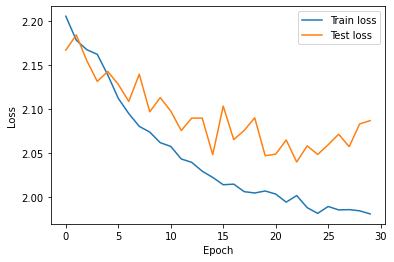

In [ ]:
plt.plot(range(num_epoch), seq_train_loss, label="Train loss")
plt.plot(range(num_epoch), seq_test_loss, label="Test loss")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

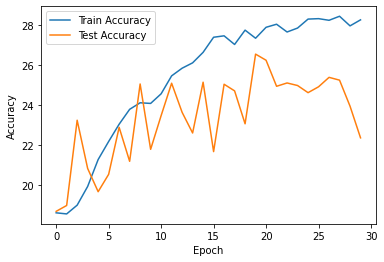

In [ ]:
plt.plot(range(num_epoch), seq_train_acc, label="Train Accuracy")
plt.plot(range(num_epoch), seq_test_acc, label="Test Accuracy")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()